# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

In [1]:
import pandas as pd
RedWine=pd.read_csv("winequality_red.csv",sep=",") #reading winequality_red.csv file
RedWine.head() #Looking into top 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#RedWine=RedWine.drop_duplicates()

In [3]:
RedWine.shape #Checking the shape of our data

(1599, 12)

In [4]:
RedWine.dtypes #Checking the datatype of each attribute

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

As per problem statement Target variable i.e. quality is either good or bad so we'll use Classification to learn our model.

# EDA

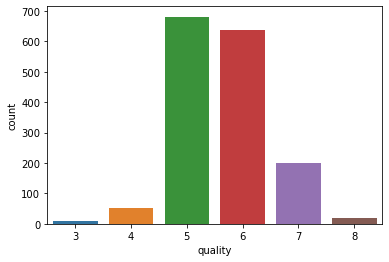

In [5]:
#Univariate Analysis
import seaborn as sns
sns.countplot(x=RedWine['quality'])

Quality of wine has 6 categories in that bad quality of wine is high i.e. <7 and good quality is low i.e. >=7

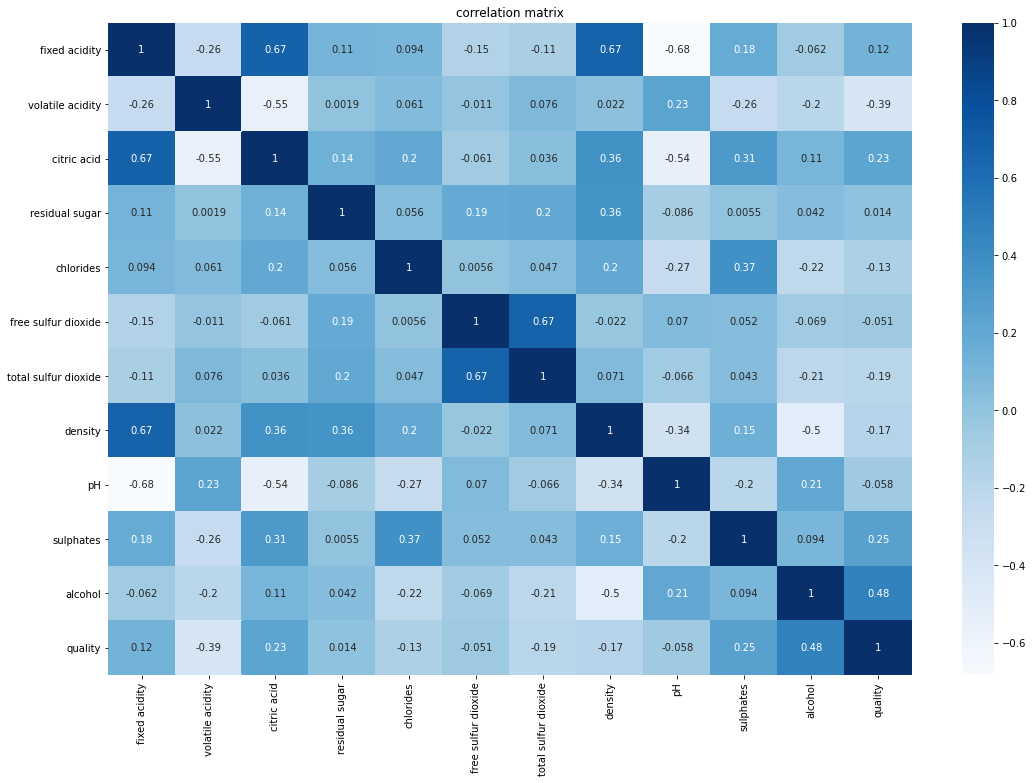

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#Multivariate Analysis
fig=plt.figure(figsize=(18,12))
hc=RedWine.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
plt.title("correlation matrix")
plt.show()

Alcohol and Volatile Acidity are heighly corelated among all and Residual Sugar, Free Sulfur Dioxide and pH is least corelated with Quality.

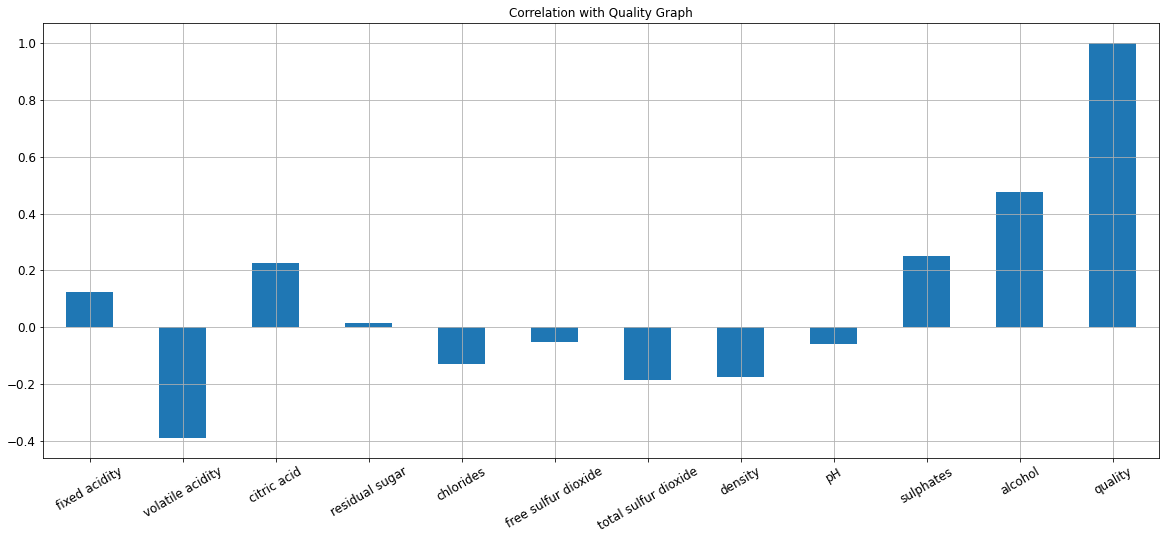

In [7]:
#Correlation with Quality with respect to attributes
RedWine.corrwith(RedWine.quality).plot.bar(
        figsize = (20, 8), title = "Correlation with Quality Graph", fontsize = 12,
        rot = 30, grid = True)

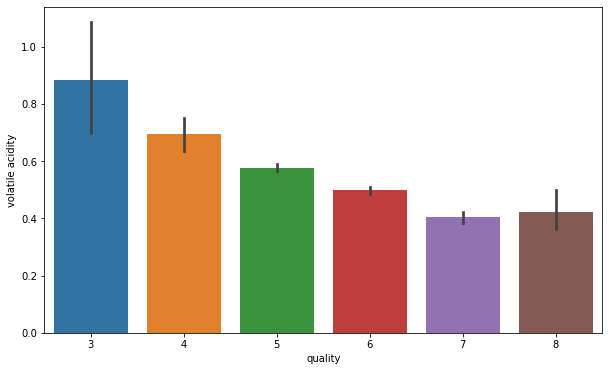

In [8]:
# Quantity of volatile acidity and quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = RedWine)

Heigher the quantity of Volatile Acidity, lower the quality

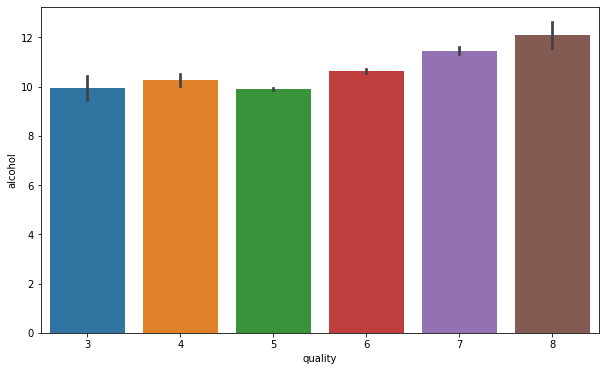

In [9]:
# Quantity of alcohol and quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = RedWine)

Heigher the quantity of alcohol , heigher the quality

# DATA CLEANING

In [10]:
RedWine.describe() #Looking into summary so our data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
RedWine.isnull().sum() #Checking for null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

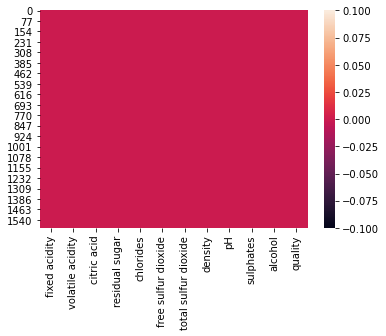

In [12]:
sns.heatmap(RedWine.isnull()) #Looking for null values if any, in heatmap

In [13]:
#Checking Outliers

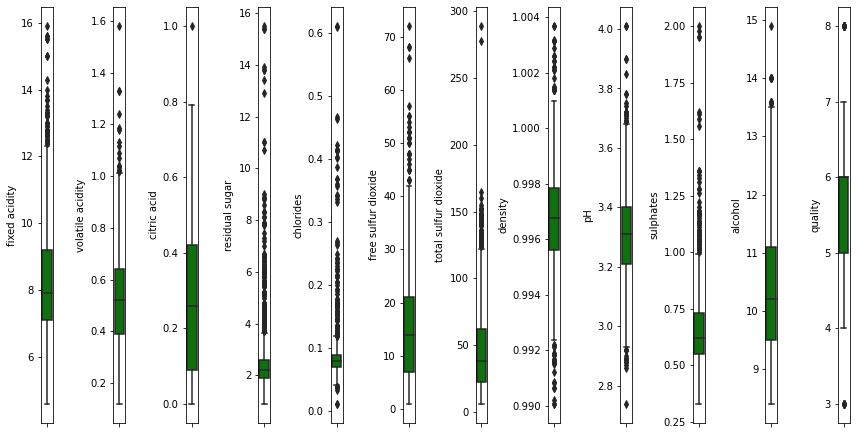

In [14]:
collist=RedWine.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(RedWine[collist[i]],color='green',orient='v')
    plt.tight_layout()

Lots of outliers we can see in data

In [15]:
#7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
import numpy as np
RedWine['quality']=np.where(RedWine['quality'].between(7,8), 1, RedWine['quality'])
RedWine['quality']=np.where(RedWine['quality'].between(3,6), 0, RedWine['quality'])
RedWine['quality'].unique()

array([0, 1], dtype=int64)

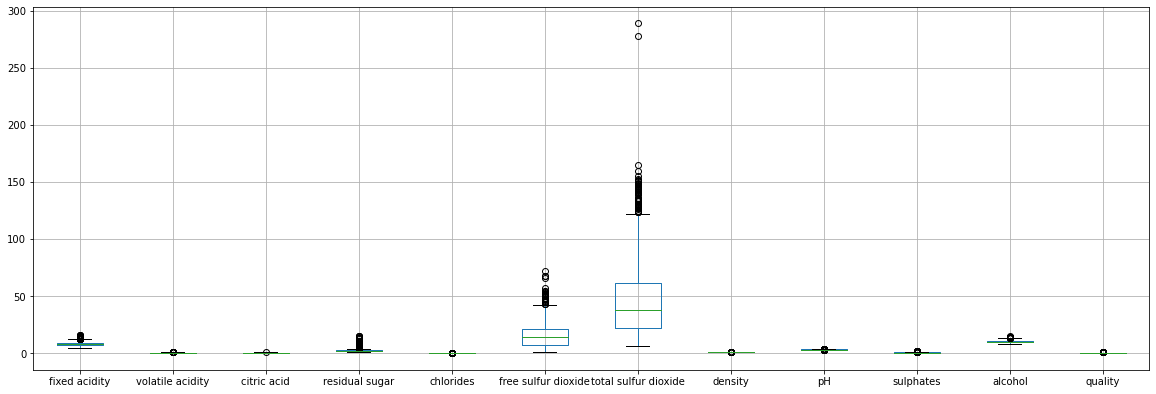

In [16]:
RedWine.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [17]:
#Removing the outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(RedWine))
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [18]:
#checking the shape of the data
df=RedWine
df_new=df[(z<3).all(axis = 1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1458, 12)


In [19]:
#checking for how much data we lost
loss_percent=(1599-1458)/1599*100
print(loss_percent)

8.818011257035648


we lost almost 9% of our data which a good number but still lesser than 10. So we can procced. 

In [20]:
#checking the skewness of our data
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

residual sugar, chlorides, total sulfur dioxide and etc Skewness is heigh. we need to reduce it.

In [21]:
#Seperating x and y
x=df_new.drop("quality",axis=1)
y=df_new["quality"]

In [22]:
#Removing skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [23]:
#adding the columns heading
df_new=pd.DataFrame(df_new,columns=x.columns)
x=df_new

In [24]:
x.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

Sknessness is removed from data

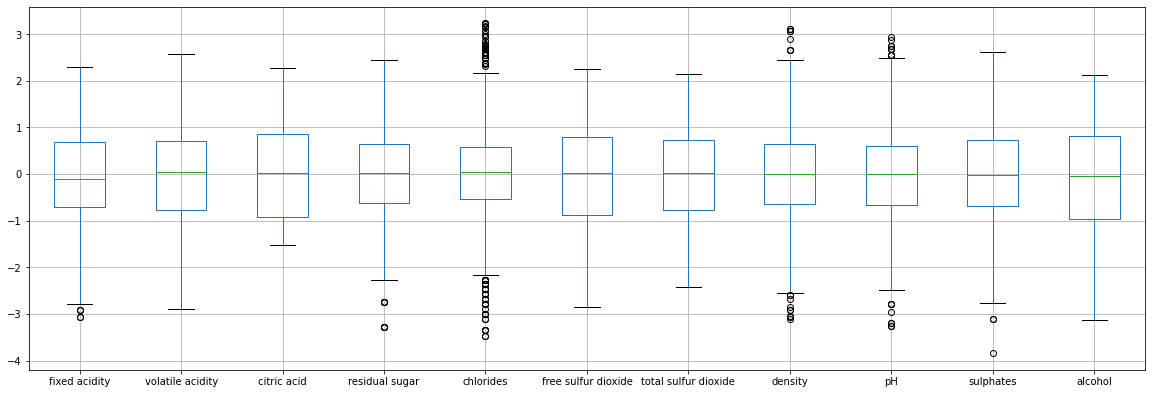

In [25]:
#Looking for outliers
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We have many outliers in Chlorides, Density and pH.

In [26]:
#Question for Evaluator - Now What to do with these outliers ?

In [27]:
#Checking how my data looks like
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329
1,-0.172127,1.902404,-1.521870,0.648011,0.981105,1.092232,0.954919,0.056291,-0.818421,0.453527,-0.526854
2,-0.172127,1.344815,-1.242790,0.207208,0.714585,0.241177,0.626959,0.172545,-0.382868,0.221989,-0.526854
3,1.571351,-1.559116,1.441794,-0.610050,-0.207728,0.442705,0.786687,0.750325,-1.112726,-0.391548,-0.526854
4,-0.469102,1.045775,-1.521870,-0.610050,-0.145674,-0.238196,-0.063312,0.635233,1.359954,-0.588230,-1.112329


In [28]:
#My target values
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [29]:
print(y.shape)

(1458,)


In [30]:
pd.unique(y)

array([0, 1], dtype=int64)

In [31]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1458, dtype: int64


# Finding Best Random State

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.91324200913242  on Random_state  133


# Train Test Split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=133)

# Finding Best Algorithm

In [34]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.91324200913242
[[385  10]
 [ 28  15]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       395
           1       0.60      0.35      0.44        43

    accuracy                           0.91       438
   macro avg       0.77      0.66      0.70       438
weighted avg       0.90      0.91      0.90       438



In [35]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')  #kernel='rbf'  ---->default SVC
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9246575342465754
[[385  10]
 [ 23  20]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       395
           1       0.67      0.47      0.55        43

    accuracy                           0.92       438
   macro avg       0.81      0.72      0.75       438
weighted avg       0.92      0.92      0.92       438



In [36]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier(criterion='gini')---------->default
#DecisionTreeClassifier(criterion='entropy')
#Gini and entropy
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8744292237442922
[[363  32]
 [ 23  20]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       395
           1       0.38      0.47      0.42        43

    accuracy                           0.87       438
   macro avg       0.66      0.69      0.68       438
weighted avg       0.89      0.87      0.88       438



In [37]:
from sklearn.neighbors import KNeighborsClassifier
#k=5 KNeighbors Classifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8995433789954338
[[373  22]
 [ 22  21]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       395
           1       0.49      0.49      0.49        43

    accuracy                           0.90       438
   macro avg       0.72      0.72      0.72       438
weighted avg       0.90      0.90      0.90       438



In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9337899543378996
[[387   8]
 [ 21  22]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       395
           1       0.73      0.51      0.60        43

    accuracy                           0.93       438
   macro avg       0.84      0.75      0.78       438
weighted avg       0.93      0.93      0.93       438



SVC and Random Forest have highest Accuracy Score, it's maybe because of overfitting.

To find best algorithm, need to check cross_val_score.

# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR ,x , y, cv=5)
print("Cross validation score of LogisticRegression :",scr.mean())

Cross validation score of LogisticRegression : 0.871745986913336


In [40]:
scr=cross_val_score(svc ,x , y, cv=5)
print("Cross validation score of SVC :",scr.mean())

Cross validation score of SVC : 0.8655651273360636


In [41]:
scr=cross_val_score(dtc ,x , y, cv=5)
print("Cross validation score of DecisionTreeClassifier :",scr.mean())

Cross validation score of DecisionTreeClassifier : 0.8195499694016852


In [42]:
scr=cross_val_score(knn ,x , y, cv=5)
print("Cross validation score of KNeighborsClassifier :",scr.mean())

Cross validation score of KNeighborsClassifier : 0.8490773431247941


In [43]:
scr=cross_val_score(rf ,x , y, cv=5)
print("Cross validation score of RandomForestClassifier :",scr.mean())

Cross validation score of RandomForestClassifier : 0.8840747540366237


Cross validation Score of LogisticRegression is near to it's Accuracy Score. So we'll conclude that LogisticRegression have highest accuracy.

# Hyper Parameter Tuning

In [44]:
import numpy as np
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' :['l2', 'elasticnet', 'none'],
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'penalty': 'l2', 'solver': 'liblinear'}

In [45]:
clf_pred=clf.best_estimator_.predict(x_test)

In [46]:
accuracy_score(y_test,clf_pred)

0.91324200913242

Our model learnt almost 91% and performing well

# Performing AOC ROC

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
dtc_predict_prob = dtc.predict_proba(x_test)[:,1:]
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1:]
y_pred_prob

array([[8.91326021e-02],
       [3.25026090e-03],
       [4.47093940e-03],
       [5.69274410e-02],
       [1.57639238e-02],
       [7.67909423e-01],
       [4.44524062e-01],
       [2.42885494e-03],
       [1.60036362e-01],
       [4.90864310e-03],
       [5.35080195e-03],
       [2.14552123e-03],
       [2.08371122e-02],
       [2.36354878e-03],
       [1.80398966e-01],
       [1.94118184e-01],
       [8.07763051e-02],
       [7.97667471e-03],
       [9.44550148e-02],
       [1.47720523e-02],
       [3.62917673e-01],
       [6.82801741e-03],
       [9.17506640e-03],
       [7.32328820e-03],
       [4.00864802e-02],
       [4.50347323e-01],
       [1.78797230e-01],
       [3.50985900e-02],
       [5.37730827e-02],
       [4.24317966e-03],
       [1.02887799e-02],
       [1.93068594e-03],
       [4.82519902e-03],
       [5.19572184e-01],
       [6.00303848e-02],
       [4.99346707e-02],
       [1.60122875e-02],
       [2.61451977e-03],
       [1.37947797e-02],
       [5.15999009e-03],


In [48]:
fpr,tpr,thresholds=roc_curve(y_test,dtc_predict_prob) # calculating fpr, tpr

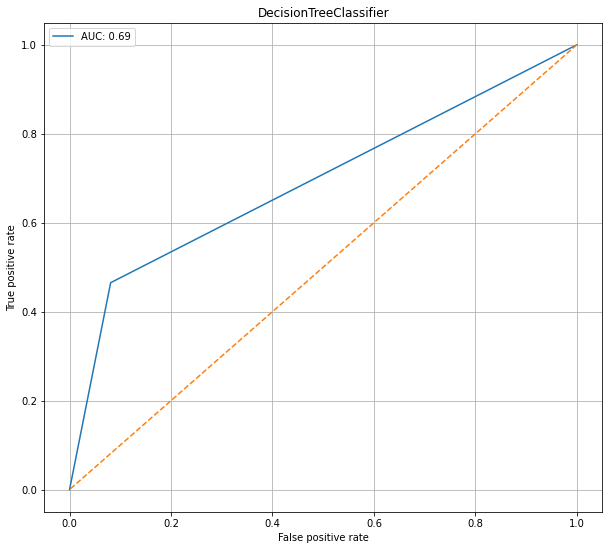

In [49]:
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Saving the model

In [50]:
import joblib
joblib.dump(clf.best_estimator_,"PJ3_RedWine.pkl")
LR_from_joblib=joblib.load('PJ3_RedWine.pkl')
LR_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([LR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437
Predicted,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0
